# Exercise 1: Linear regression with multiple variables

In [1]:
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_2/ex1/'
sys.path.append(path_to_modules)
from featureNormalize import featureNormalize
from gradientDescentMulti import gradientDescentMulti
from normalEqn import normalEqn

import matplotlib.pyplot as plt
import numpy as np

## Part 1: Feature Normalization

In [2]:
data = np.loadtxt(path_to_modules + 'ex1data2.txt', delimiter =",")

X = data[:, 0:2]
y = data[:, 2]

m = y.size #umber of training examples

y = y.reshape((m,1)) #make y a matrix (m x 1)

#Scale features and set them to zero mean
print("Normalizing Features ...\n");

X, mu, sigma = featureNormalize(X)

#Add intercept term to X
X = np.c_[np.ones((m, 1)), X] # Add a column of ones to x

Normalizing Features ...



## Part 2: Gradient Descent

Running gradient descent ...



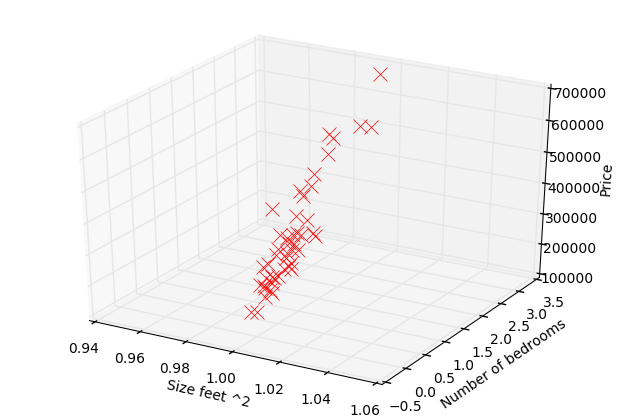

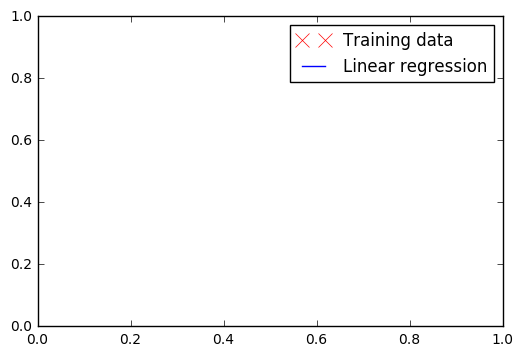

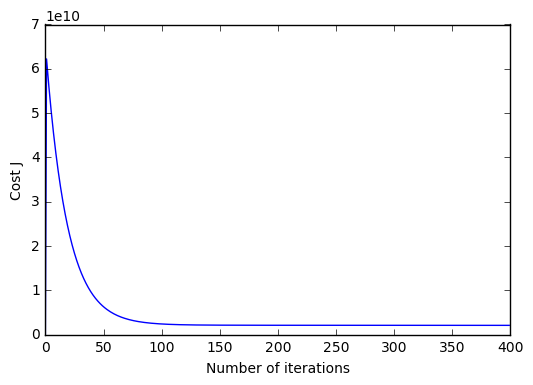

Theta computed from gradient descent: 


 [[ 120009.23670485]
 [ 148523.18318162]
 [-104847.7651808 ]]


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 [[ 295844.67404394]]


In [3]:
print("Running gradient descent ...\n")

#Choose some alpha value
alpha = 0.01
num_iters = 400

#Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))

J_history, theta = gradientDescentMulti(X, y, theta, alpha, num_iters)


#3D plot data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

A = X[:,0].reshape((m))
B = X[:,1].reshape((m))
C = y.reshape(m)

training_data_plot, = ax.plot3D(A, B, zs=C, linestyle='None', color='red', marker='x', markersize=10, label="Training data")
ax.set_xlabel("Size feet ^2")
ax.set_ylabel('Number of bedrooms')
ax.set_zlabel('Price')
plt.show(block=False)

C = np.dot(X, theta).reshape(m)

#Plot the linear fit
linea_regression_plot, = ax.plot3D(A, B, zs=C, color = 'blue', label="Linear regression")
plt.show(block=False)
plt.legend(handles=[training_data_plot, linea_regression_plot])

#Plot the convergence graph
plt.figure(2) #new window
plt.plot(np.arange(0,num_iters), J_history, linestyle='solid', color='blue')
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")

plt.show()


#Display gradient descent's result
print("Theta computed from gradient descent: \n")
print("\n", theta)
print("\n")



# Estimate the price of a 1650 sq-ft, 3 br house

normaliz_test_data = np.divide(np.array([[1650, 3]]) - mu, sigma)
price = np.dot(np.c_[1, normaliz_test_data] , theta)

print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n", price)

## Part 3: Normal Equations

In [5]:
print("Solving with normal equations...\n")

#Load Data
data = np.loadtxt(path_to_modules + 'ex1data2.txt', delimiter =",")
X = data[:, 0:2]
y = data[:, 2]
m = y.size #umber of training examples
y = y.reshape((m,1)) #make y a matrix (m x 1)


#Add intercept term to X
X = np.c_[np.ones((m, 1)), X] # Add a column of ones to x

#Calculate the parameters from the normal equation
theta = normalEqn(X, y)

#Display normal equation's result
print("Theta computed from the normal equations: \n")
print("\n", theta)
print("\n")


#Estimate the price of a 1650 sq-ft, 3 br house

price = np.dot(np.array([[1, 1650, 3]]), theta)


print("Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n", price)

Solving with normal equations...

shape theta (3, 1)
Theta computed from the normal equations: 


 [[ 89597.90954361]
 [   139.21067402]
 [ -8738.01911255]]


Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 [[ 293081.46433499]]
